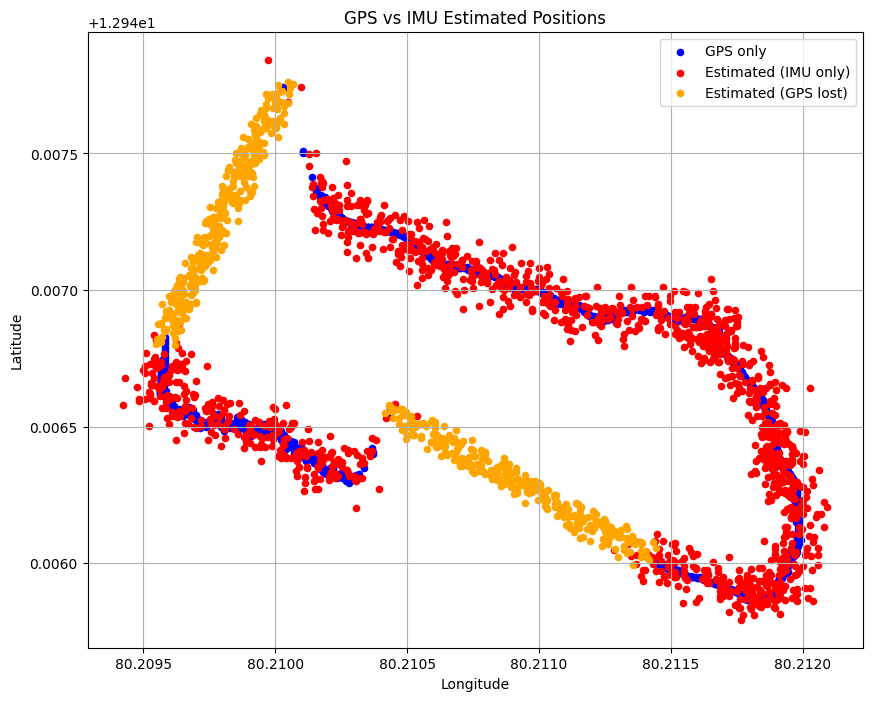

In [4]:
import matplotlib.pyplot as plt
import re
import numpy as np

# Path to your updated file
input_file = '/content/data_interpolated_updated.txt'

# Empty lists to store data
gps_lat, gps_lon = [], []
imu_lat, imu_lon = [], []
gpslost_lat, gpslost_lon = [], []

# Read the updated file
with open(input_file, 'r') as file:
    for line in file:
        # GPS only lines
        match_gps = re.search(r'GPS only:\s*([-\d.]+),\s*([-\d.]+)', line)
        if match_gps:
            gps_lat.append(float(match_gps.group(1)))
            gps_lon.append(float(match_gps.group(2)))
            continue

        # Estimated (IMU only) lines
        match_imu = re.search(r'Estimated \(IMU only\):\s*([-\d.]+),\s*([-\d.]+)', line)
        if match_imu:
            imu_lat.append(float(match_imu.group(1)))
            imu_lon.append(float(match_imu.group(2)))
            continue

        # Estimated (GPS lost) lines if present
        match_gpslost = re.search(r'Estimated \(GPS lost\):\s*([-\d.]+),\s*([-\d.]+)', line)
        if match_gpslost:
            gpslost_lat.append(float(match_gpslost.group(1)))
            gpslost_lon.append(float(match_gpslost.group(2)))
            continue

# Convert lists to numpy arrays for convenience (optional)
gps_lat, gps_lon = np.array(gps_lat), np.array(gps_lon)
imu_lat, imu_lon = np.array(imu_lat), np.array(imu_lon)

# Plotting
plt.figure(figsize=(10, 8))

# GPS only: Blue dots
plt.scatter(gps_lon, gps_lat, c='blue', s=20, label='GPS only')

# IMU only: Red dots
plt.scatter(imu_lon, imu_lat, c='red', s=20, label='Estimated (IMU only)')

# (Optional) GPS lost: Orange dots, if data exists
if gpslost_lat:
    plt.scatter(gpslost_lon, gpslost_lat, c='orange', s=20, label='Estimated (GPS lost)')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS vs IMU Estimated Positions')
plt.legend()
plt.grid(True)
plt.show()



In [5]:
import folium
import numpy as np
import re

# Path to your updated dataset
input_file = '/content/data_interpolated_updated.txt'

# Initialize empty lists
gpsonly_lat, gpsonly_lon = [], []
imuonly_lat, imuonly_lon = [], []
imu_gpslost_lat, imu_gpslost_lon = [], []

# Parse the updated dataset directly
with open(input_file, 'r') as file:
    for line in file:
        # GPS only
        match_gpsonly = re.search(r'GPS only:\s*([-\d.]+),\s*([-\d.]+)', line)
        if match_gpsonly:
            gpsonly_lat.append(float(match_gpsonly.group(1)))
            gpsonly_lon.append(float(match_gpsonly.group(2)))
            continue

        # Estimated (IMU only)
        match_imuonly = re.search(r'Estimated \(IMU only\):\s*([-\d.]+),\s*([-\d.]+)', line)
        if match_imuonly:
            imuonly_lat.append(float(match_imuonly.group(1)))
            imuonly_lon.append(float(match_imuonly.group(2)))
            continue

        # Estimated (GPS lost)
        match_gpslost = re.search(r'Estimated \(GPS lost\):\s*([-\d.]+),\s*([-\d.]+)', line)
        if match_gpslost:
            imu_gpslost_lat.append(float(match_gpslost.group(1)))
            imu_gpslost_lon.append(float(match_gpslost.group(2)))
            continue

# Fallback for map center
if len(gpsonly_lat) > 0:
    start_lat, start_lon = gpsonly_lat[0], gpsonly_lon[0]
elif len(imu_gpslost_lat) > 0:
    start_lat, start_lon = imu_gpslost_lat[0], imu_gpslost_lon[0]
else:
    start_lat, start_lon = 0, 0

# Initialize Folium map
map_ = folium.Map(location=[start_lat, start_lon], zoom_start=15, max_bounds=True)

# Plot GPS-only as blue dots
for lat, lon in zip(gpsonly_lat, gpsonly_lon):
    folium.CircleMarker(
        location=[lat, lon],
        radius=4,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.9,
        tooltip='GPS only'
    ).add_to(map_)

# Plot Estimated (IMU only) as red dots (from dataset, no mimic)
for lat, lon in zip(imuonly_lat, imuonly_lon):
    folium.CircleMarker(
        location=[lat, lon],
        radius=3,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        tooltip='Estimated (IMU only)'
    ).add_to(map_)

# Plot Estimated (GPS lost) as orange dots
for lat, lon in zip(imu_gpslost_lat, imu_gpslost_lon):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.8,
        tooltip='Estimated (GPS lost)'
    ).add_to(map_)

# Fit map to bounds
all_lats = gpsonly_lat + imuonly_lat + imu_gpslost_lat
all_lons = gpsonly_lon + imuonly_lon + imu_gpslost_lon
if len(all_lats) > 0 and len(all_lons) > 0:
    sw = [min(all_lats), min(all_lons)]
    ne = [max(all_lats), max(all_lons)]
    map_.fit_bounds([sw, ne])

# Save and display
map_.save("gps_path_plot.html")
map_


In [6]:
import re
from datetime import datetime

gpsonly_lat, gpsonly_lon = [], []
imu_gpslost_lat, imu_gpslost_lon = [], []
all_timestamps = []

with open('/content/data_interpolated_updated.txt', 'r') as file:
    for line in file:
        # Extract timestamp if present
        match_time = re.match(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3})', line)
        if match_time:
            timestamp = datetime.strptime(match_time.group(1), "%Y-%m-%d %H:%M:%S.%f")
            all_timestamps.append(timestamp)

        # Parse "GPS only:" lines
        match_gpsonly = re.search(r'GPS only:\s*([-\d.]+),\s*([-\d.]+)', line)
        if match_gpsonly:
            lat, lon = float(match_gpsonly.group(1)), float(match_gpsonly.group(2))
            gpsonly_lat.append(lat)
            gpsonly_lon.append(lon)
            continue

        # Parse "Estimated (GPS lost):" lines
        match_gpslost = re.search(r'Estimated \(GPS lost\):\s*([-\d.]+),\s*([-\d.]+)', line)
        if match_gpslost:
            lat, lon = float(match_gpslost.group(1)), float(match_gpslost.group(2))
            imu_gpslost_lat.append(lat)
            imu_gpslost_lon.append(lon)
            continue

# Number of waypoints
num_gpsonly = len(gpsonly_lat)
num_gpslost = len(imu_gpslost_lat)
total_waypoints = num_gpsonly + num_gpslost

print("Number of GPS only waypoints:", num_gpsonly)
print("Number of Estimated (GPS lost) waypoints:", num_gpslost)
print("Total number of waypoints:", total_waypoints)

# Calculate sampling rate (data points per second)
if all_timestamps:
    duration = (all_timestamps[-1] - all_timestamps[0]).total_seconds()
    if duration > 0:
        sampling_rate = len(all_timestamps) / duration
        print(f"Average data points per second: {sampling_rate:.2f}")
    else:
        print("Duration too short to calculate sampling rate.")
else:
    print("No timestamps found to calculate sampling rate.")


Number of GPS only waypoints: 1316
Number of Estimated (GPS lost) waypoints: 618
Total number of waypoints: 1934
Average data points per second: 56.02
